In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sfusion import kalman as km

## Simulated Data

In [2]:
data = pd.read_csv('sensor_data.csv')

In [3]:
data.tail()

,Time,GPS_X,GPS_Y,GPS_Z,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z
136,137.0,-60.455554,98.851238,1.078981,0.049012,0.653989,9.828025,0.000708,-0.005904,0.137316
137,138.0,-49.799500,94.773929,-1.248468,-0.063041,0.651397,9.802573,0.000641,-0.003279,0.136047
138,139.0,-44.740711,93.354282,-3.877529,0.419327,0.705692,9.808173,0.000525,-0.003264,0.146898
139,140.0,-39.891844,93.421933,-6.332853,-0.211591,0.728985,9.761687,-0.001100,0.017697,0.141475
140,141.0,-41.909417,106.600739,2.945977,0.070264,0.720854,9.818441,0.000722,0.012766,0.142953


## 1. LinearKFGPS1D

### 1.1. Raw Data Plot

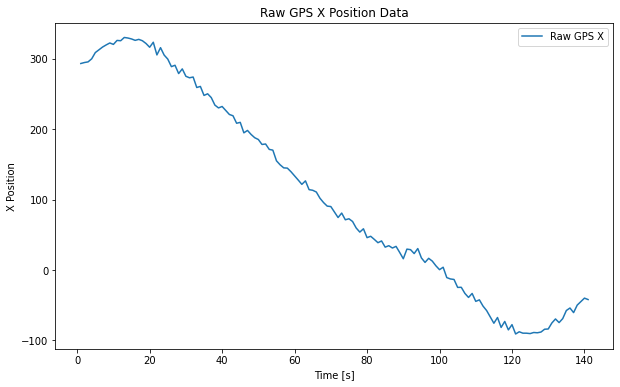

In [4]:
# Plot the raw GPS data for the x direction
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data')
plt.legend()
plt.show()

### 1.2. Sensor Fusion

In [5]:
# Initialize the Kalman filter for the x direction
initial_state = [data['GPS_X'].iloc[0], 0]  # initial position and velocity
initial_covariance = np.eye(2)
process_noise = np.eye(2) * 0.01
measurement_noise = np.eye(1) * 0.1

kf = km.LinearKFGPS1D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []

num_readings = data.shape[0]

for i in range(num_readings):
    kf.predict(dt=1)
    kf.update(measurement=[data['GPS_X'].iloc[i]])
    fused_positions.append(kf.state[0])
    fused_velocities.append(kf.state[1])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)

### 1.3. Fused Data Plot

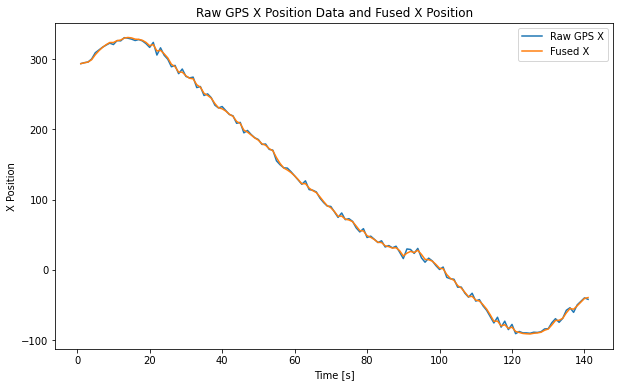

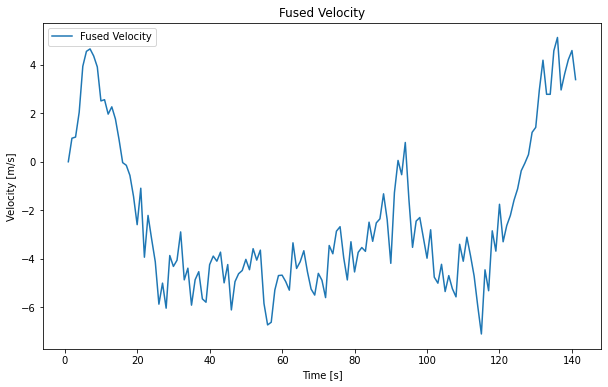

In [6]:
# Plot the fused data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'], fused_positions, label='Fused X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data and Fused X Position')
plt.legend()
plt.show()

# Plot the fused data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities, label='Fused Velocity', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Fused Velocity')
plt.legend()
plt.show()

### 1.4. Zoomed-in Plot

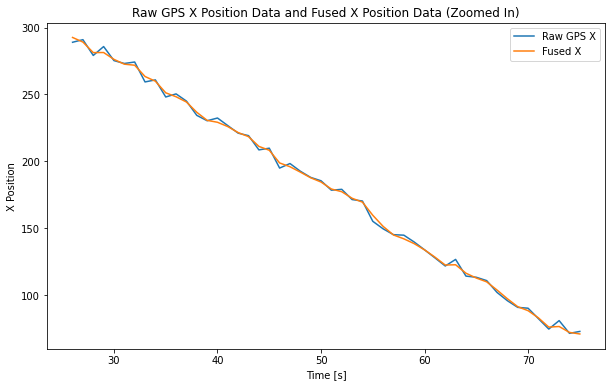

In [7]:
# Define the range you want to zoom in on
start_time = 25
end_time = 75

# Plot the fused data with zoom
plt.figure(figsize=(10, 6))
plt.plot(data['Time'][start_time:end_time], data['GPS_X'][start_time:end_time], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'][start_time:end_time], fused_positions[start_time:end_time], label='Fused X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data and Fused X Position Data (Zoomed In)')
plt.legend()
plt.show()

## 2. LinearKFGPS2D

### 2.1. Raw Data Plot

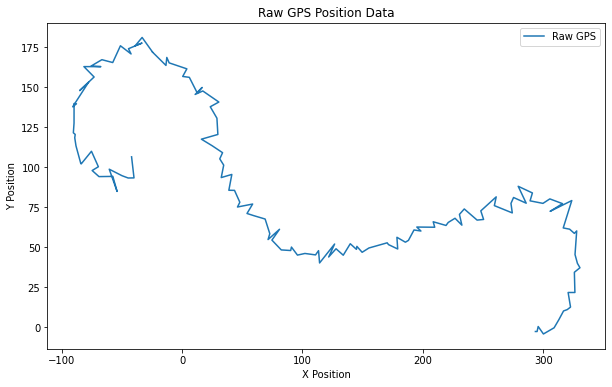

In [8]:
# Plot the raw GPS data for the x and y directions
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'], data['GPS_Y'], label='Raw GPS', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Position Data')
plt.legend()
plt.show()

### 2.2. Sensor Fusion

In [9]:
# Initialize the Kalman filter for the x and y directions
initial_state = [data['GPS_X'].iloc[0], data['GPS_Y'].iloc[0], 0, 0]  # initial positions and velocities
initial_covariance = np.eye(4)
process_noise = np.eye(4) * 0.01
measurement_noise = np.eye(2) * 0.1

kf = km.LinearKFGPS2D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []

for i in range(num_readings):
    kf.predict(dt=1)
    kf.update(measurement=[data['GPS_X'].iloc[i], data['GPS_Y'].iloc[i]])
    fused_positions.append(kf.state[:2])
    fused_velocities.append(kf.state[2:])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)

### 2.3. Fused Data Plot

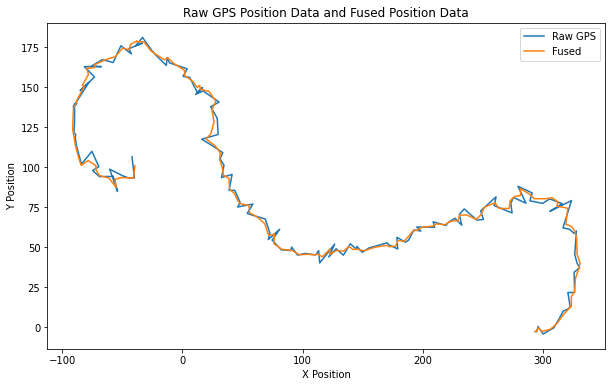

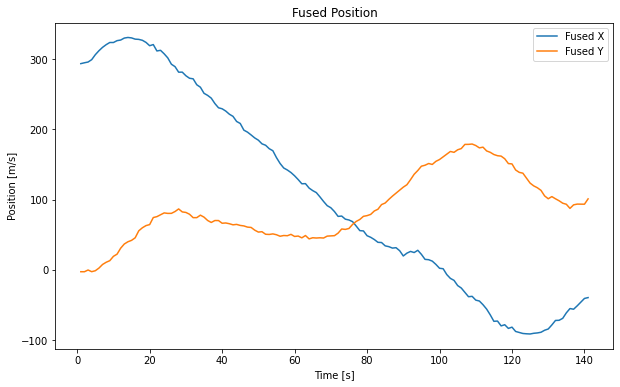

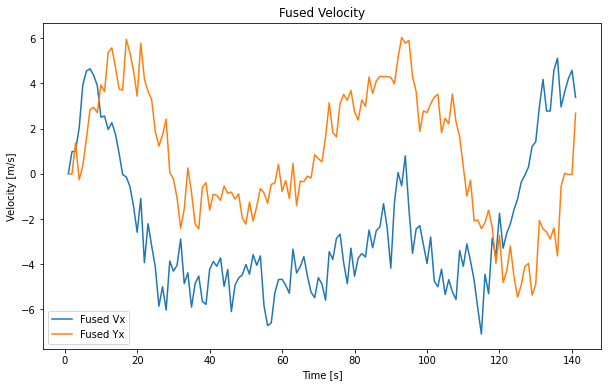

In [10]:
# Plot the fused data along with the raw data
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'], data['GPS_Y'], label='Raw GPS', linestyle='-')
plt.plot(fused_positions[:, 0], fused_positions[:, 1], label='Fused', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Position Data and Fused Position Data')
plt.legend()
plt.show()

# Plot the fused data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_positions[:, 0], label='Fused X', linestyle='-')
plt.plot(data['Time'], fused_positions[:, 1], label='Fused Y', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Position [m/s]')
plt.title('Fused Position')
plt.legend()
plt.show()

# Plot the fused data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities[:, 0], label='Fused Vx', linestyle='-')
plt.plot(data['Time'], fused_velocities[:, 1], label='Fused Yx', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Fused Velocity')
plt.legend()
plt.show()

### 2.4. Zoomed-in Plot

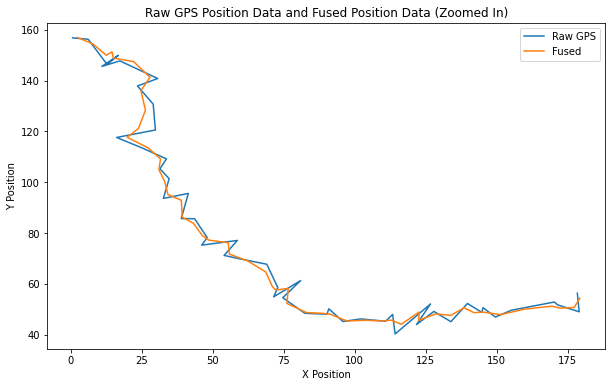

In [11]:
# Define the range you want to zoom in on (adjust indices based on your data)
start_time = 50
end_time = 100

# Plot the fused data with zoom
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'][start_time:end_time], data['GPS_Y'][start_time:end_time], label='Raw GPS', linestyle='-')
plt.plot(fused_positions[start_time:end_time, 0], fused_positions[start_time:end_time, 1], label='Fused', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Position Data and Fused Position Data (Zoomed In)')
plt.legend()
plt.show()

## 3. LinearKFGPSAccelerometer1D

### 3.1. Raw Data Plot

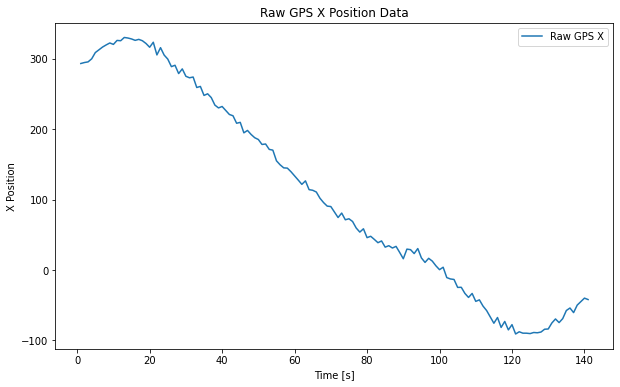

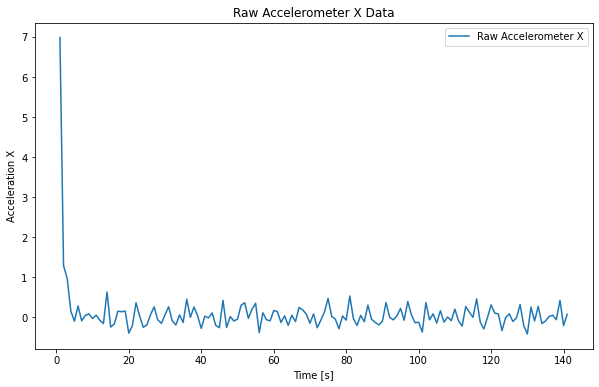

In [12]:
# Plot the raw GPS X data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data')
plt.legend()
plt.show()

# Plot the raw accelerometer X data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Accel_X'], label='Raw Accelerometer X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration X')
plt.title('Raw Accelerometer X Data')
plt.legend()
plt.show()

### 3.2. Sensor Fusion

In [13]:
# Initialize the Kalman filter for the x direction
initial_state = [data['GPS_X'].iloc[0], 0]  # initial position and velocity
initial_covariance = np.eye(2)
process_noise = np.eye(2) * 0.01
measurement_noise = np.eye(1) * 0.1

kf = km.LinearKFGPSAccelerometer1D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []

for i in range(len(data)):
    acceleration = data['Accel_X'].iloc[i]
    kf.predict(dt=1, acceleration=acceleration)
    kf.update(measurement=data['GPS_X'].iloc[i])
    fused_positions.append(kf.state[0])
    fused_velocities.append(kf.state[1])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)

### 3.3. Fused Data Plot

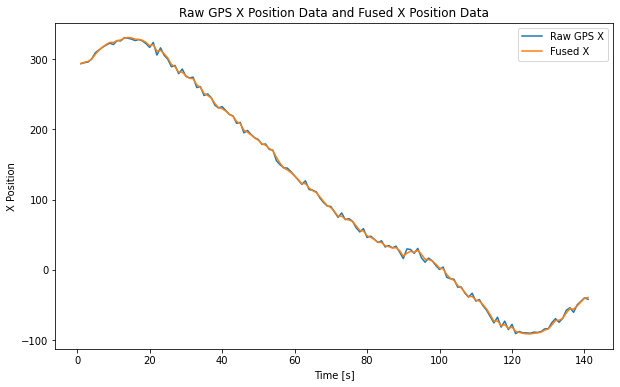

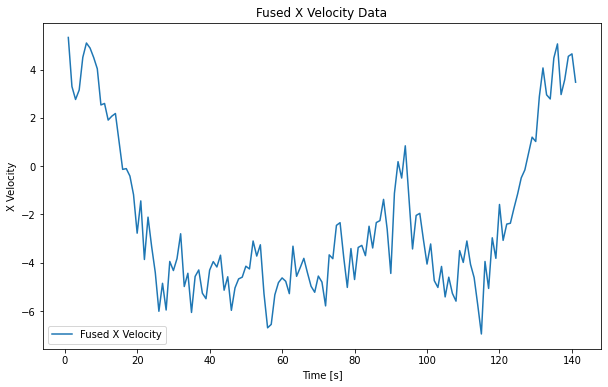

In [14]:
# Plot the fused data along with the raw data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'], fused_positions, label='Fused X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data and Fused X Position Data')
plt.legend()
plt.show()

# Plot the fused velocity data along with the raw data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities, label='Fused X Velocity', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Velocity')
plt.title('Fused X Velocity Data')
plt.legend()
plt.show()

### 3.4. Zoomed-in Plot

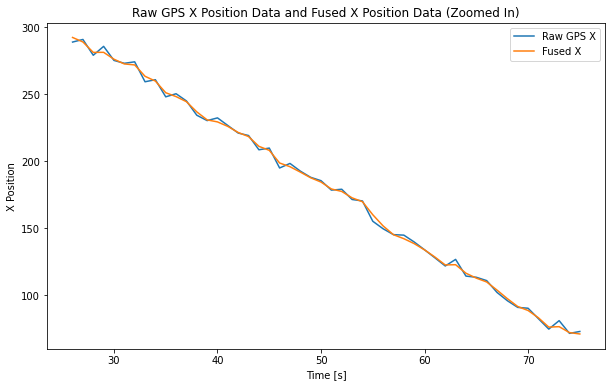

In [15]:
# Define the range you want to zoom in on (adjust indices based on your data)
start_time = 25
end_time = 75

# Plot the fused data with zoom
plt.figure(figsize=(10, 6))
plt.plot(data['Time'][start_time:end_time], data['GPS_X'][start_time:end_time], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'][start_time:end_time], fused_positions[start_time:end_time], label='Fused X', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('X Position')
plt.title('Raw GPS X Position Data and Fused X Position Data (Zoomed In)')
plt.legend()
plt.show()

## 4. LinearKFGPSAccelerometer2D

### 4.1. Raw Data Plot

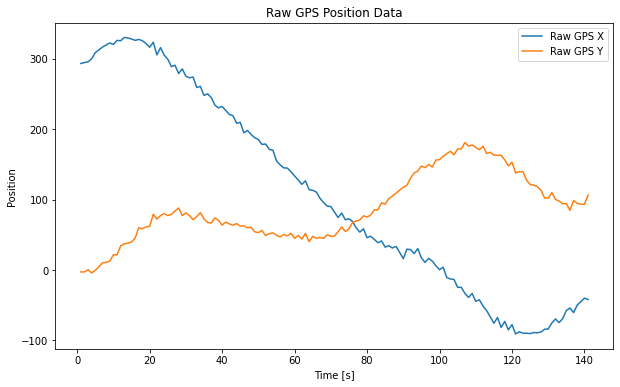

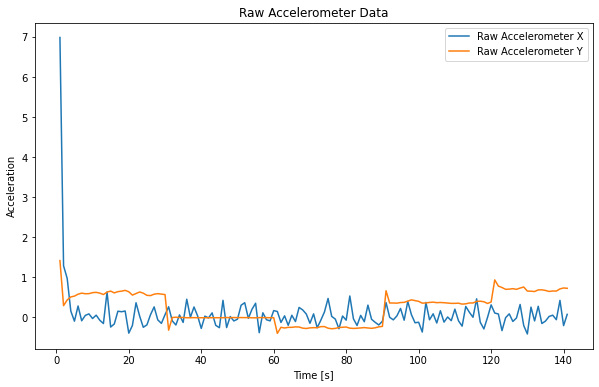

In [16]:
# Plot the raw GPS X and Y data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'], data['GPS_Y'], label='Raw GPS Y', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.title('Raw GPS Position Data')
plt.legend()
plt.show()

# Plot the raw accelerometer X and Y data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Accel_X'], label='Raw Accelerometer X', linestyle='-')
plt.plot(data['Time'], data['Accel_Y'], label='Raw Accelerometer Y', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.title('Raw Accelerometer Data')
plt.legend()
plt.show()

### 4.2. Sensor Fusion

In [17]:
# Initialize the Kalman filter for the x and y directions
initial_state = [data['GPS_X'].iloc[0], data['GPS_Y'].iloc[0], 0, 0]  # initial positions and velocities
initial_covariance = np.eye(4)
process_noise = np.eye(4) * 0.01
measurement_noise = np.eye(2) * 0.1

kf = km.LinearKFGPSAccelerometer2D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []

for i in range(len(data)):
    acceleration = [data['Accel_X'].iloc[i], data['Accel_Y'].iloc[i]]
    kf.predict(dt=1, acceleration=acceleration)
    kf.update(measurement=[data['GPS_X'].iloc[i], data['GPS_Y'].iloc[i]])
    fused_positions.append(kf.state[:2])
    fused_velocities.append(kf.state[2:])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)

### 4.3. Fused Data Plot

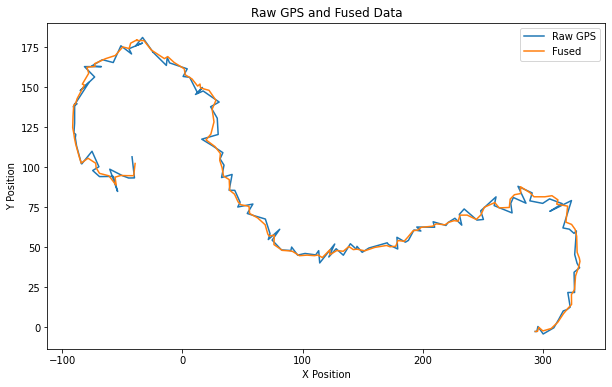

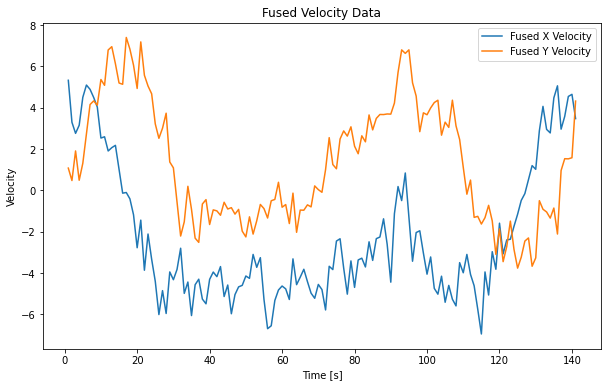

In [18]:
# Plot the fused trajectory data along with the raw GPS data
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'], data['GPS_Y'], label='Raw GPS', linestyle='-')
plt.plot(fused_positions[:, 0], fused_positions[:, 1], label='Fused', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS and Fused Data')
plt.legend()
plt.show()

# Plot the fused velocity data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities[:, 0], label='Fused X Velocity', linestyle='-')
plt.plot(data['Time'], fused_velocities[:, 1], label='Fused Y Velocity', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Velocity')
plt.title('Fused Velocity Data')
plt.legend()
plt.show()

### 4.4. Zoomed-in Plot

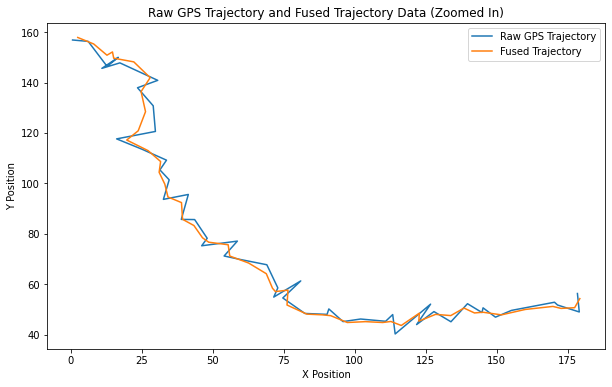

In [19]:
# Define the range you want to zoom in on (adjust indices based on your data)
start_time = 50
end_time = 100

# Plot the fused data with zoom for the trajectory
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'][start_time:end_time], data['GPS_Y'][start_time:end_time], label='Raw GPS Trajectory', linestyle='-')
plt.plot(fused_positions[start_time:end_time, 0], fused_positions[start_time:end_time, 1], label='Fused Trajectory', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Trajectory and Fused Trajectory Data (Zoomed In)')
plt.legend()
plt.show()

## 5. LinearKFGPSGyro2D

### 5.1. Raw Data Plot

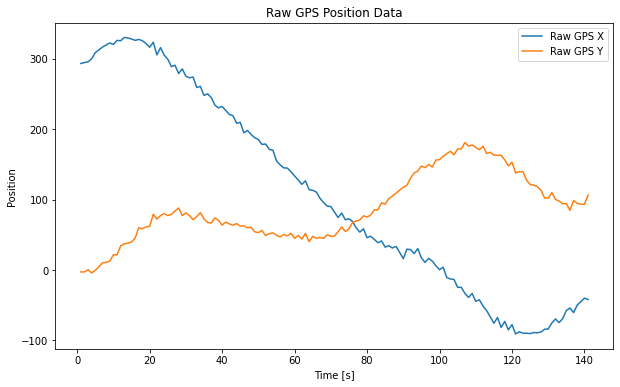

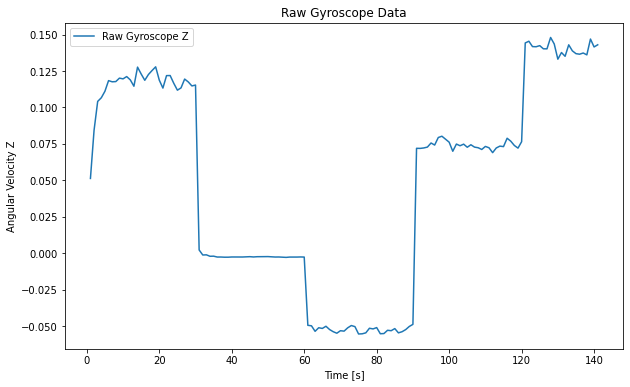

In [20]:
# Plot the raw GPS X and Y data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['GPS_X'], label='Raw GPS X', linestyle='-')
plt.plot(data['Time'], data['GPS_Y'], label='Raw GPS Y', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Position')
plt.title('Raw GPS Position Data')
plt.legend()
plt.show()

# Plot the raw gyroscope data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Gyro_Z'], label='Raw Gyroscope Z', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Angular Velocity Z')
plt.title('Raw Gyroscope Data')
plt.legend()
plt.show()

### 5.2. Sensor Fusion

In [21]:
# Initialize the Kalman filter for the x and y directions
initial_state = [data['GPS_X'].iloc[0], data['GPS_Y'].iloc[0], 0, 0, 0]  # initial positions, velocities, and orientation
initial_covariance = np.eye(5)
process_noise = np.eye(5) * 0.01
measurement_noise = np.eye(2) * 0.1

kf = km.LinearKFGPSGyro2D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []
orientations = []

for i in range(len(data)):
    angular_velocity = data['Gyro_Z'].iloc[i]
    kf.predict(dt=1, angular_velocity=angular_velocity)
    kf.update(measurement=[data['GPS_X'].iloc[i], data['GPS_Y'].iloc[i]])
    fused_positions.append(kf.state[:2])
    fused_velocities.append(kf.state[2:4])
    orientations.append(kf.state[4])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)
orientations = np.array(orientations)

### 5.3. Fused Data Plot

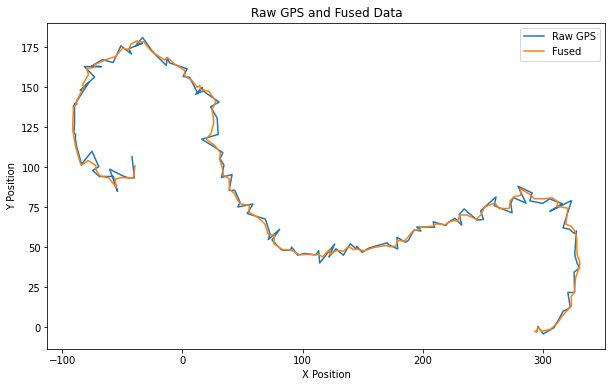

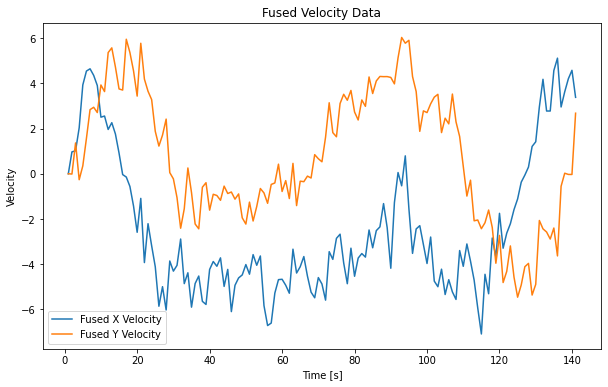

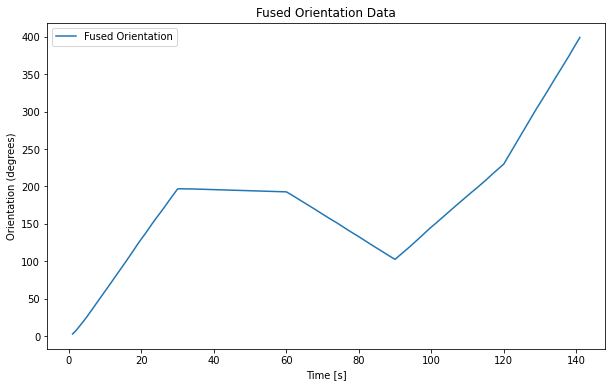

In [22]:
# Plot the fused trajectory data along with the raw GPS data
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'], data['GPS_Y'], label='Raw GPS', linestyle='-')
plt.plot(fused_positions[:, 0], fused_positions[:, 1], label='Fused', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS and Fused Data')
plt.legend()
plt.show()

# Plot the fused velocity data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities[:, 0], label='Fused X Velocity', linestyle='-')
plt.plot(data['Time'], fused_velocities[:, 1], label='Fused Y Velocity', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Velocity')
plt.title('Fused Velocity Data')
plt.legend()
plt.show()

# Convert orientation from radians to degrees
orientations_degrees = np.degrees(orientations)

# Plot the fused orientation data in degrees
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], orientations_degrees, label='Fused Orientation', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Orientation (degrees)')
plt.title('Fused Orientation Data')
plt.legend()
plt.show()

### 5.4. Zoomed-in Plot

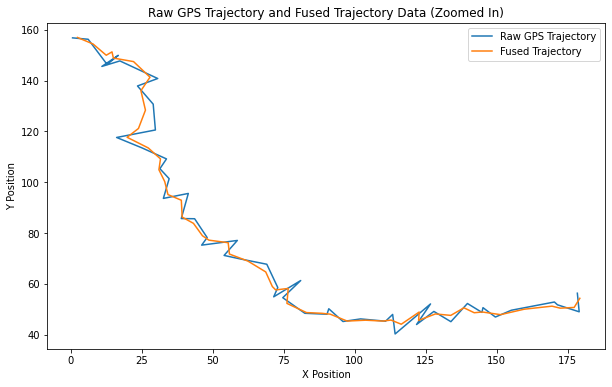

In [23]:
# Define the range you want to zoom in on (adjust indices based on your data)
start_time = 50
end_time = 100

# Plot the fused data with zoom for the trajectory
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'][start_time:end_time], data['GPS_Y'][start_time:end_time], label='Raw GPS Trajectory', linestyle='-')
plt.plot(fused_positions[start_time:end_time, 0], fused_positions[start_time:end_time, 1], label='Fused Trajectory', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Trajectory and Fused Trajectory Data (Zoomed In)')
plt.legend()
plt.show()

## 6. LinearKFGPSAccelerometerGyro2D

### 6.1. Raw Data Plot

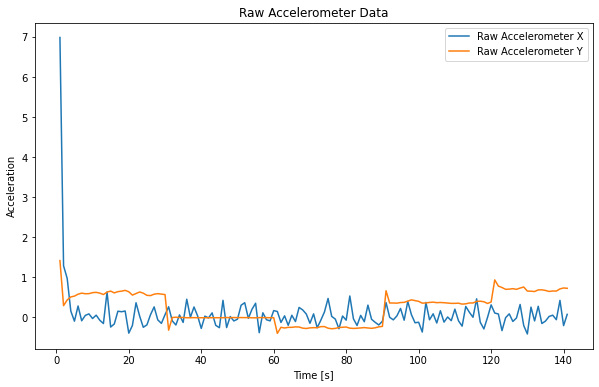

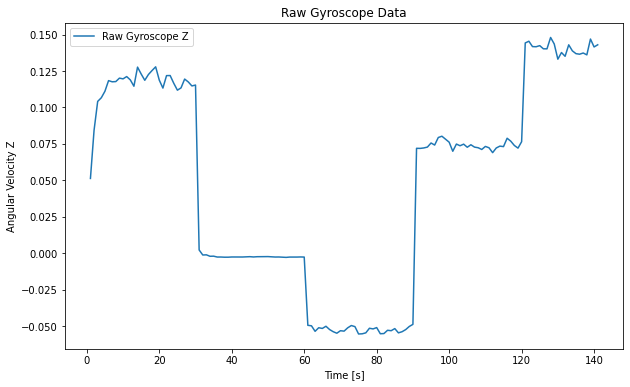

In [24]:
# Plot the raw accelerometer X and Y data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Accel_X'], label='Raw Accelerometer X', linestyle='-')
plt.plot(data['Time'], data['Accel_Y'], label='Raw Accelerometer Y', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration')
plt.title('Raw Accelerometer Data')
plt.legend()
plt.show()

# Plot the raw gyroscope data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Gyro_Z'], label='Raw Gyroscope Z', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Angular Velocity Z')
plt.title('Raw Gyroscope Data')
plt.legend()
plt.show()

### 6.2. Sensor Fusion

In [25]:
# Initialize the Kalman filter for the x and y directions
initial_state = [data['GPS_X'].iloc[0], data['GPS_Y'].iloc[0], 0, 0, 0]  # initial positions, velocities, and orientation
initial_covariance = np.eye(5)
process_noise = np.eye(5) * 0.01
measurement_noise = np.eye(2) * 0.1

kf = km.LinearKFGPSAccelerometerGyro2D(initial_state, initial_covariance, process_noise, measurement_noise)

# Run the Kalman filter
fused_positions = []
fused_velocities = []
orientations = []

for i in range(len(data)):
    acceleration = [data['Accel_X'].iloc[i], data['Accel_Y'].iloc[i]]
    angular_velocity = data['Gyro_Z'].iloc[i]
    kf.predict(dt=1, control_input=[acceleration[0], acceleration[1], angular_velocity])
    kf.update(measurement=[data['GPS_X'].iloc[i], data['GPS_Y'].iloc[i]])
    fused_positions.append(kf.state[:2])
    fused_velocities.append(kf.state[2:4])
    orientations.append(kf.state[4])

fused_positions = np.array(fused_positions)
fused_velocities = np.array(fused_velocities)
orientations = np.array(orientations)

### 6.3. Fused Data Plot

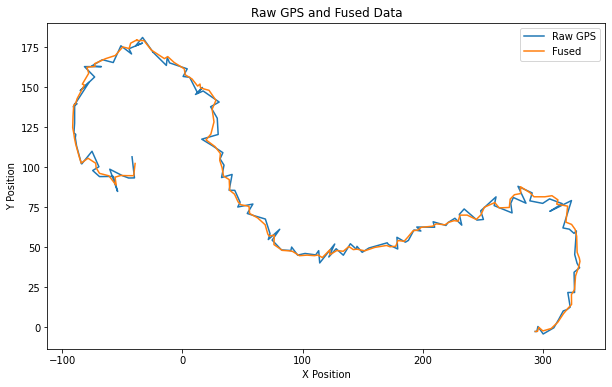

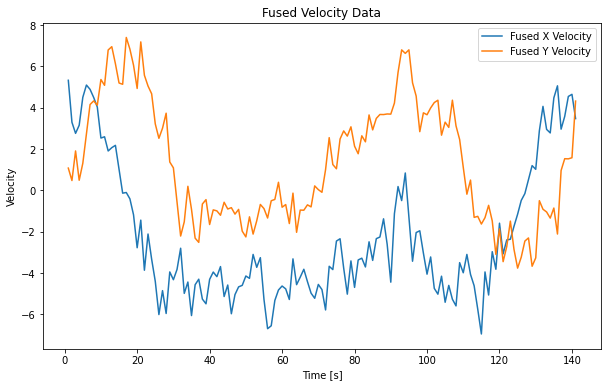

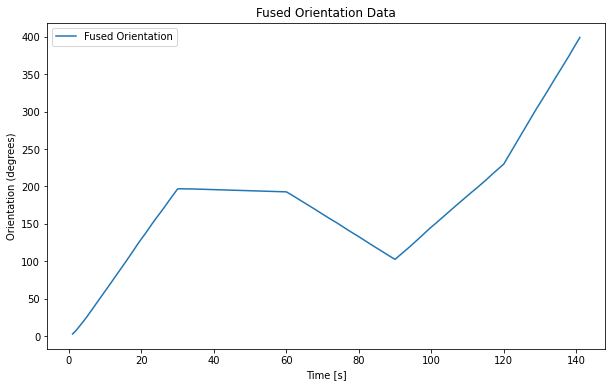

In [26]:
# Plot the fused trajectory data along with the raw GPS data
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'], data['GPS_Y'], label='Raw GPS', linestyle='-')
plt.plot(fused_positions[:, 0], fused_positions[:, 1], label='Fused', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS and Fused Data')
plt.legend()
plt.show()

# Plot the fused velocity data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], fused_velocities[:, 0], label='Fused X Velocity', linestyle='-')
plt.plot(data['Time'], fused_velocities[:, 1], label='Fused Y Velocity', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Velocity')
plt.title('Fused Velocity Data')
plt.legend()
plt.show()

# Convert orientation from radians to degrees
orientations_degrees = np.degrees(orientations)

# Plot the fused orientation data in degrees
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], orientations_degrees, label='Fused Orientation', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Orientation (degrees)')
plt.title('Fused Orientation Data')
plt.legend()
plt.show()

### 6.4. Zoomed-in Plot

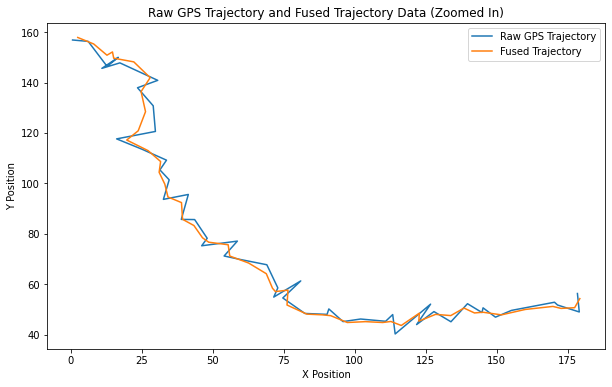

In [27]:
# Define the range you want to zoom in on (adjust indices based on your data)
start_time = 50
end_time = 100

# Plot the fused data with zoom for the trajectory
plt.figure(figsize=(10, 6))
plt.plot(data['GPS_X'][start_time:end_time], data['GPS_Y'][start_time:end_time], label='Raw GPS Trajectory', linestyle='-')
plt.plot(fused_positions[start_time:end_time, 0], fused_positions[start_time:end_time, 1], label='Fused Trajectory', linestyle='-')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Raw GPS Trajectory and Fused Trajectory Data (Zoomed In)')
plt.legend()
plt.show()